# SATELITE IMAGE CLASSIFICTION PROJECT

Building a Satelite image classification system using deep learning involves leveraging neural network architectures, particularly Convolutional Neural Networks (CNNs), to automatically learn features from the images and make predictions

Import Necessary libaries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import glob
from sklearn.model_selection import train_test_split

Collect Image Paths for Each Category

In [4]:
cloudy= glob.glob('data/cloudy/*.jpg')
desert= glob.glob('data/desert/*.jpg')
green_area=glob.glob('data/green_area/*.jpg')
water= glob.glob('data/water/*.jpg')

Define Classes and Corresponding Labels

In [6]:
classes = {0: 'cloudy', 1: 'desert', 2: 'green_area', 3: 'water'}

Load and Label Images for Each Category

In [7]:
images = []
labels = []

for i in cloudy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

Plot first few images

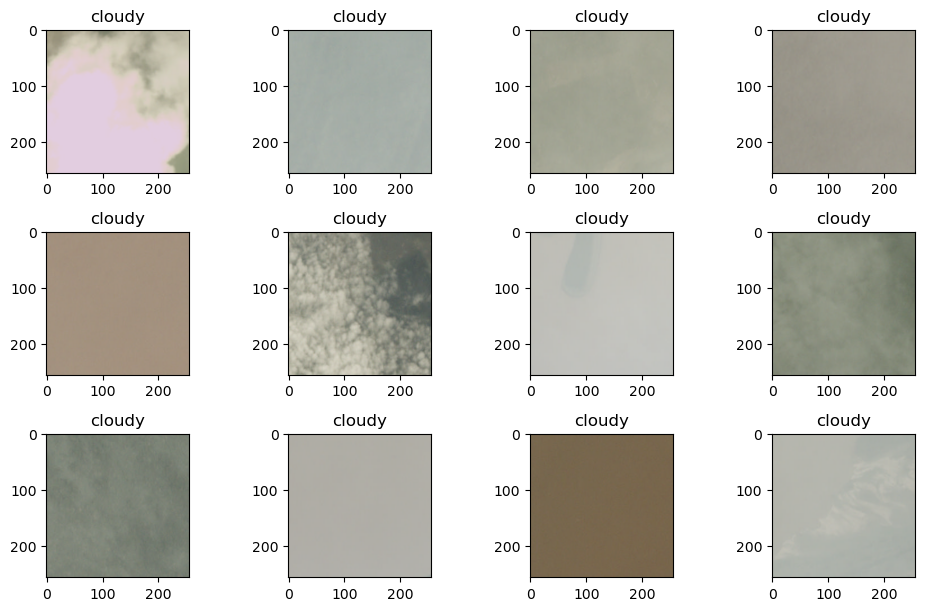

In [9]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

Shuffle the images

In [11]:
images,labels = shuffle(images,labels)

Plot some of the image after the shuffle

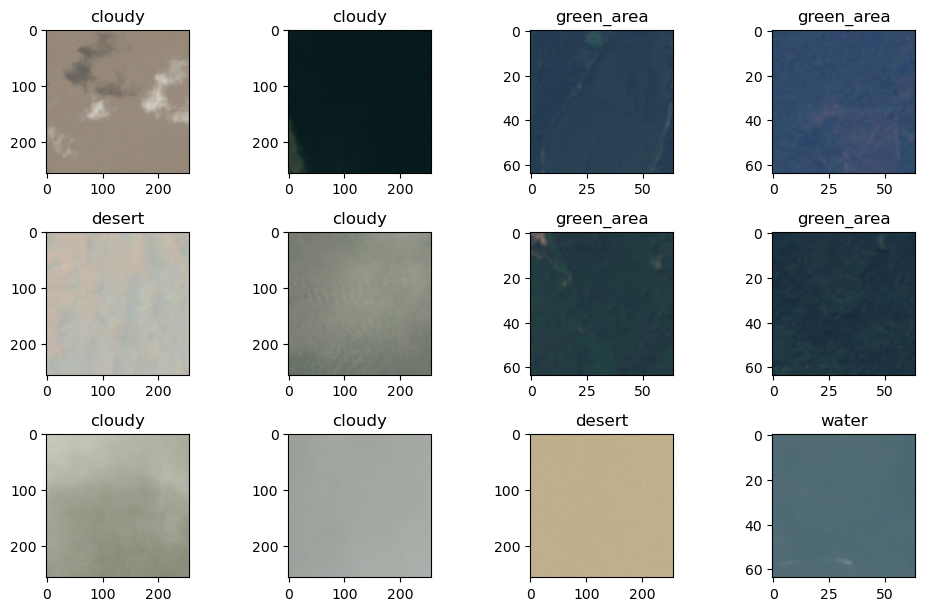

In [12]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

Resize the images to 64X64

In [13]:
X = []

for i in images:
    X.append(resize(i, (64,64,3)))

Plot some of the resized images

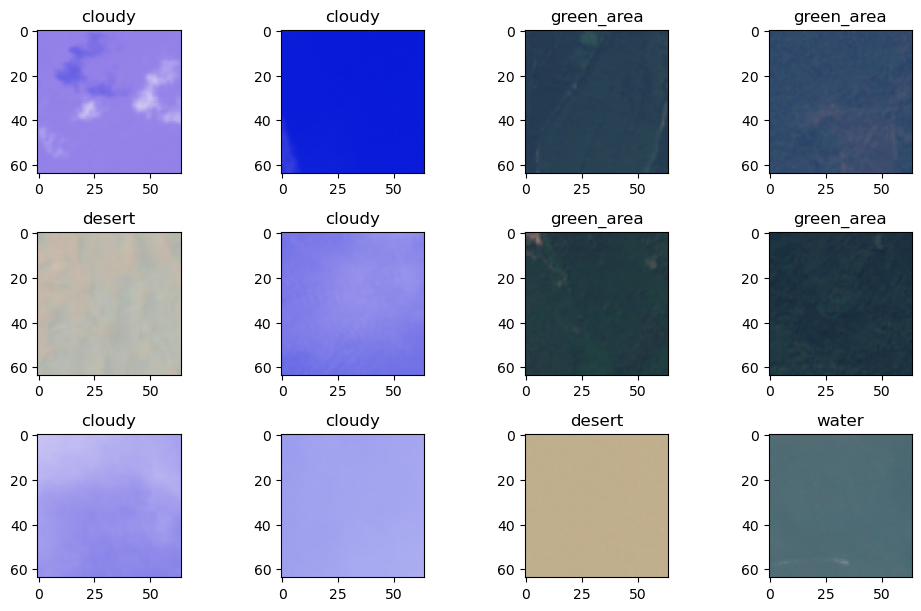

In [15]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

Convert image and label datatypes from list to Numpy array

In [16]:
X = np.array(X)
y = np.array(labels)

Splitting into training and testing set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Check the shape of X_train and y_train

In [18]:
X_train.shape

(4504, 64, 64, 3)

In [19]:
y_train.shape

(4504,)

Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'sigmoid')
])

Compile our model

In [22]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Check model summary

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,820 (1.55 MB)

 Trainable params: 406,820 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Train our model with X_train and y_train

In [24]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6625 - loss: 0.6492 - val_accuracy: 0.8847 - val_loss: 0.2678
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8897 - loss: 0.2561 - val_accuracy: 0.8381 - val_loss: 0.2907
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8938 - loss: 0.2250 - val_accuracy: 0.9113 - val_loss: 0.1823
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9084 - loss: 0.1927 - val_accuracy: 0.8936 - val_loss: 0.2163
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9130 - loss: 0.1883 - val_accuracy: 0.9246 - val_loss: 0.1628
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9209 - loss: 0.1712 - val_accuracy: 0.9357 - val_loss: 0.1492
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9247 - loss: 0.1563 - val_accuracy: 0.9557 - val_loss: 0.1196
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9176 - loss: 0.1628 - val_ac

Evaluate our model

In [25]:
model.evaluate(X_train, y_train)

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9166 - loss: 0.1813


[0.18348819017410278, 0.9158525466918945]

Make predictions with X_test

In [26]:
prediction = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [27]:
prediction

array([[1.6739400e-04, 7.4806772e-03, 9.9995565e-01, 9.8790997e-01],
       [3.5506947e-04, 1.1191881e-02, 9.9989510e-01, 9.8273772e-01],
       [9.9865156e-01, 1.0000000e+00, 3.3949581e-03, 9.9877536e-01],
       ...,
       [1.9098587e-03, 2.9194763e-02, 9.9931645e-01, 9.8441184e-01],
       [3.4450516e-01, 7.5236887e-01, 8.7069678e-01, 9.9987787e-01],
       [1.0000000e+00, 4.6662055e-03, 4.0536419e-01, 3.8736740e-01]],
      dtype=float32)

In [32]:
pred = [np.argmax(i) for i in prediction]

In [33]:
pred

[2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 3,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 3,
 0,
 2,
 3,
 1,
 0,
 2,
 3,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 2,
 1,
 0,
 1,
 2,
 3,
 0,
 3,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 3,
 2,
 0,
 0,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 3,
 3,
 2,
 0,
 0,
 3,
 3,
 3,
 0,
 1,
 0,
 0,
 3,
 0,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 2,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 2,
 2,
 3,
 0,
 2,
 1,
 3,
 1,
 2,
 2,
 0,
 0,
 0,
 3,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 3,
 0,
 3,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 3,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 3,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 3,
 3,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 3,
 2,
 0,
 1,
 2,
 1,
 3,
 0,
 0,
 2,
 0,
 3,
 2,
 1,
 2,
 0,
 3,
 2,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 0,
 3,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 2,


Plot X_test along with label from our prediction

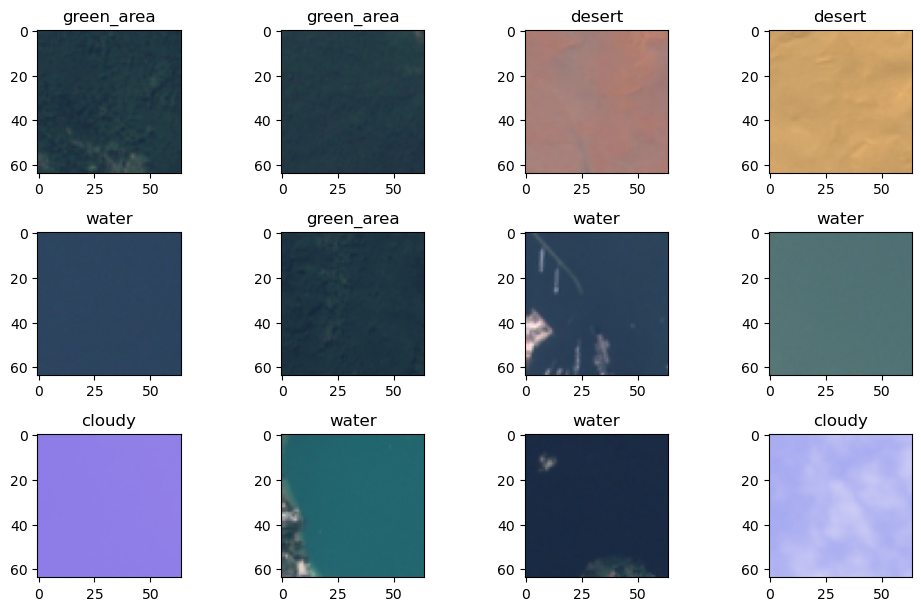

In [34]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(classes[pred[i]])
plt.tight_layout()

accuracy_score,confusion matrix,classification report

accuracy_score

In [37]:
accuracy_score(y_test,pred)

0.9228039041703638

confusion_matrix

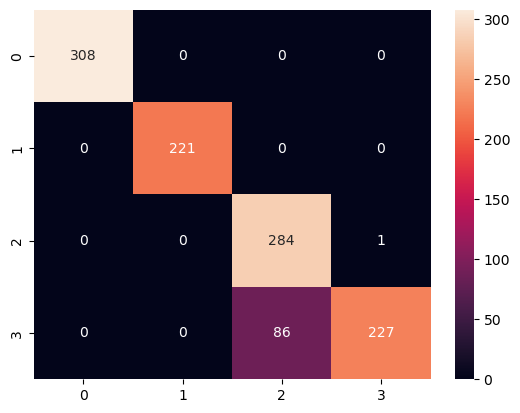

In [38]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True,fmt='d')
plt.show()

classification_report

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      1.00      1.00       221
           2       0.77      1.00      0.87       285
           3       1.00      0.73      0.84       313

    accuracy                           0.92      1127
   macro avg       0.94      0.93      0.93      1127
weighted avg       0.94      0.92      0.92      1127

